First question - What does the data suggest of HighestEducation in terms of salary and also if attend bootcamp can help boost salary based on current education level?

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [258]:
education_df = pd.read_csv('survey_results_public.csv')

In [260]:
education_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [261]:
#In this case, we want to look at Formal Education data
#First - let's look at how many people filled out this column in the dataset

education_df = df[df['FormalEducation'].isnull()==False]
education_df.shape[0],df.shape[0]

(51392, 51392)

In [262]:
# All respondent filled out formal education column
# Now let us look at how many respondents per formal education category
education_df.HighestEducationParents.value_counts()

A bachelor's degree                                    10175
A master's degree                                       7561
High school                                             5887
Some college/university study, no bachelor's degree     4783
A doctoral degree                                       2060
A professional degree                                   1546
Primary/elementary school                               1378
I don't know/not sure                                    726
I prefer not to answer                                   612
No education                                             210
Name: HighestEducationParents, dtype: int64

In [264]:
#Look at gender distribution
education_df['Gender'].value_counts()/(education_df.shape[0] - sum(education_df['Gender'].isnull()))

Male                                                       0.901332
Female                                                     0.074186
Other                                                      0.006420
Male; Other                                                0.004879
Gender non-conforming                                      0.004565
Male; Gender non-conforming                                0.001855
Female; Transgender                                        0.001598
Transgender                                                0.001569
Female; Gender non-conforming                              0.000827
Transgender; Gender non-conforming                         0.000428
Male; Female; Transgender; Gender non-conforming; Other    0.000428
Male; Female                                               0.000428
Male; Transgender                                          0.000314
Female; Transgender; Gender non-conforming                 0.000228
Male; Female; Transgender; Gender non-conforming

In [265]:
# Let us have a look which high education categories are more likely to attend bootcamp
education_df['if_bootcamp']=df['TimeAfterBootcamp'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [266]:
education_df.groupby('FormalEducation').sum()['if_bootcamp'].sort_values(ascending=False)

FormalEducation
Bachelor's degree                                                    1236
Master's degree                                                       586
Some college/university study without earning a bachelor's degree     423
Secondary school                                                      181
Doctoral degree                                                        58
Professional degree                                                    42
I prefer not to answer                                                 31
Primary/elementary school                                              24
I never completed any formal education                                 21
Name: if_bootcamp, dtype: int64

In [267]:
(education_df.groupby('FormalEducation').sum()['if_bootcamp']/education_df.FormalEducation.value_counts()).sort_values(ascending=False)

Professional degree                                                  0.058741
Bachelor's degree                                                    0.057198
Master's degree                                                      0.052599
Some college/university study without earning a bachelor's degree    0.052036
I never completed any formal education                               0.049296
Doctoral degree                                                      0.044343
Secondary school                                                     0.030636
I prefer not to answer                                               0.027953
Primary/elementary school                                            0.022923
dtype: float64

In [268]:
#repondents with higher degree such as bahelor/master are more likely to attend bootcamp
#compared with the ones that don't have higher degree such as primary/secondary education

In [269]:
#Let us look at the median salary per formal education category
education_df.groupby('FormalEducation').median()['Salary'].sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      64516.129032
Primary/elementary school                                            58064.516129
Bachelor's degree                                                    52500.000000
Master's degree                                                      50125.313283
Some college/university study without earning a bachelor's degree    48387.096774
I never completed any formal education                               37756.598240
I prefer not to answer                                               36559.139785
Secondary school                                                     34090.909091
Professional degree                                                  32258.064516
Name: Salary, dtype: float64

In [270]:
edu_sal=education_df.groupby('FormalEducation').median()['Salary'].to_frame().reset_index()

In [271]:
#Let us look at the median salary per formal education category with bootcamp experience
education_df[education_df.if_bootcamp==1].groupby('FormalEducation').median()['Salary'].sort_values(ascending=False)

FormalEducation
Doctoral degree                                                      108763.440860
Primary/elementary school                                             81136.363636
Master's degree                                                       60606.060606
Some college/university study without earning a bachelor's degree     58500.000000
Bachelor's degree                                                     57500.000000
I prefer not to answer                                                46875.000000
Professional degree                                                   38317.204301
Secondary school                                                      37634.408602
I never completed any formal education                                27379.530068
Name: Salary, dtype: float64

In [272]:
edu_sal_bc=education_df[education_df.if_bootcamp==1].groupby('FormalEducation').median()['Salary'].to_frame().reset_index()

In [273]:
#Among all the respondents, Doctoral degree holders have the highest median salary, while among 
#All bootcamp respondents, it seems salary got boosted after bootcamp 

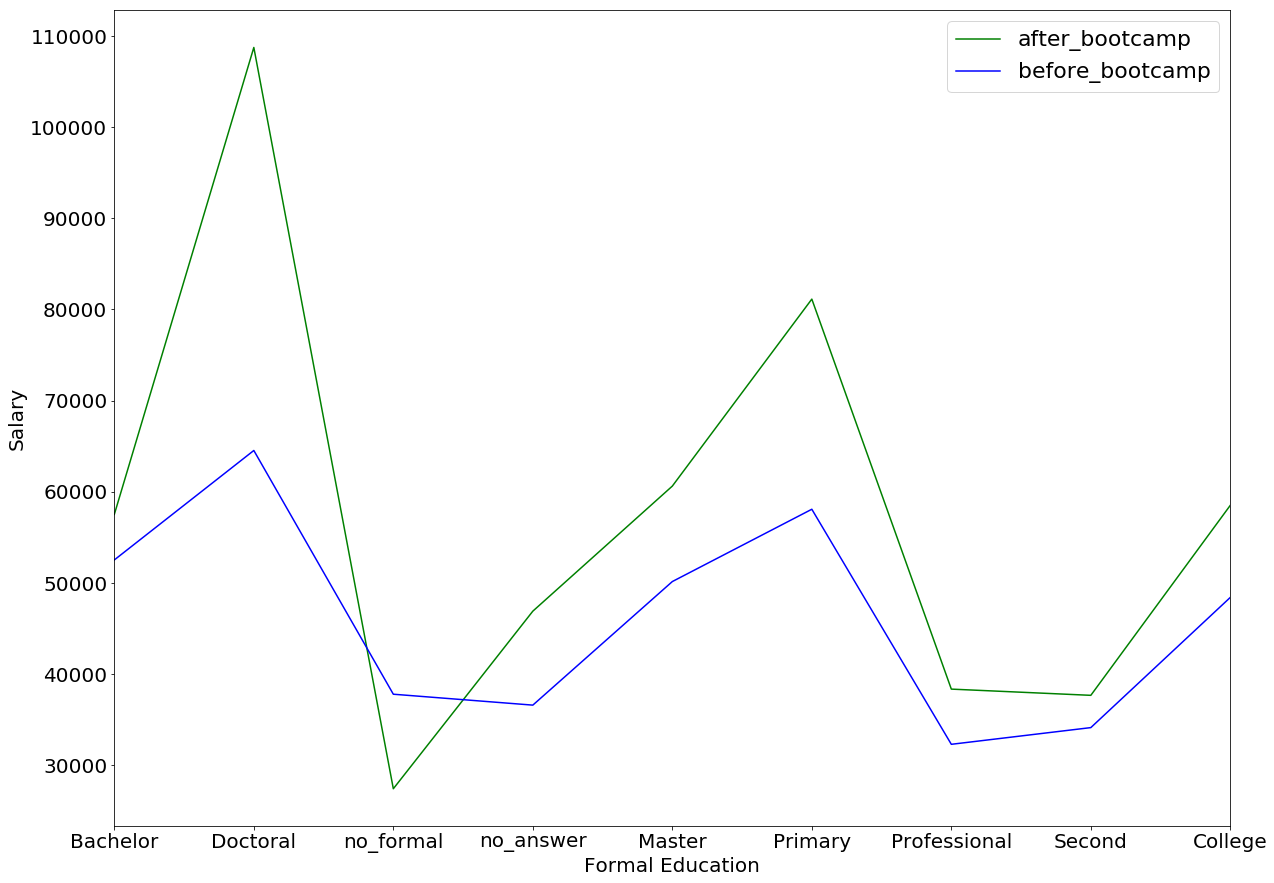

In [289]:
fig,ax = plt.subplots(figsize=(20,15))
plt.rcParams.update({'font.size': 22})
plt.rc('axes', labelsize=20)
edu_sal_bc.plot(kind='line',x='FormalEducation',y='Salary',color='green',ax=ax,label='after_bootcamp')
edu_sal.plot(kind='line',x='FormalEducation',y='Salary', color='blue', ax=ax,label='before_bootcamp')
positions = (0,1,2, 3,4,5,6,7,8)
labels = ("Bachelor", "Doctoral", "no_formal","no_answer","Master","Primary","Professional","Second","College")
plt.xticks(positions, labels)
plt.xlabel('Formal Education')
plt.ylabel('Salary')
plt.show()

In [275]:
#Here we can get some idea how bootcamp can complement education, if people have no formal 
#education, can still boost their salary if they attend bootcamp 